# Classification using sklearn MLP Classifier

In [1]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

2025-03-23 17:43:56.096222: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-23 17:43:56.413551: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-23 17:43:56.649832: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742751836.891684  206617 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742751836.984116  206617 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742751837.554897  206617 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [2]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

scaler = MinMaxScaler()
X_train, X_test = scaler.fit_transform(X_train), scaler.fit_transform(X_test)

In [4]:
model = MLPClassifier(hidden_layer_sizes=(10,), activation="relu", solver="adam", learning_rate_init=0.001, batch_size=32, random_state=42, max_iter=10)
model.fit(X_train, y_train)

/home/dipshan/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=32, hidden_layer_sizes=(10,), max_iter=10,
              random_state=42)

In [5]:
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9372
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.97      0.98      0.98      1135
           2       0.92      0.93      0.93      1032
           3       0.91      0.93      0.92      1010
           4       0.93      0.94      0.94       982
           5       0.95      0.85      0.90       892
           6       0.96      0.94      0.95       958
           7       0.95      0.94      0.94      1028
           8       0.90      0.93      0.92       974
           9       0.92      0.94      0.93      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



# Now using tensorflow's library

In [6]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten


In [7]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [8]:
X_train, X_test = X_train/255, X_test/255
y_train, y_test = tf.keras.utils.to_categorical(y_train), tf.keras.utils.to_categorical(y_test)

In [9]:
model = Sequential()
model.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(X_train, y_train, epochs=5, batch_size=32)

2025-03-23 17:44:23.504097: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/5


2025-03-23 17:44:29.517001: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8395 - loss: 0.5674
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9478 - loss: 0.1796
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9612 - loss: 0.1272
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9683 - loss: 0.1055
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9714 - loss: 0.0919


In [10]:
model.evaluate(X_test, y_test)

2025-03-23 17:45:21.656156: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9616 - loss: 0.1190


[0.10757768899202347, 0.965399980545044]

# Now lets use convolutional neural network

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [12]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1)  # Add channel dimension
X_test = X_test.reshape(-1, 28, 28, 1)

X_train, X_text = X_train/255, X_test/255



In [14]:

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:], activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer="adam", metrics=["accuracy"], loss="sparse_categorical_crossentropy")

model.fit(X_train, y_train, epochs=5, batch_size=32)


Epoch 1/5


2025-03-23 17:47:54.024072: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


   6/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.1750 - loss: 2.2949 

2025-03-23 17:48:00.205957: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 22999680 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.8654 - loss: 0.4273
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.9801 - loss: 0.0643
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9870 - loss: 0.0421
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9893 - loss: 0.0342
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9909 - loss: 0.0278


In [15]:
model.save("number_predictor.h5")

In [16]:
new_model = tf.keras.models.load_model("number_predictor.h5")

In [17]:
new_model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9738 - loss: 16.0538


[13.922274589538574, 0.9775000214576721]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


[[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0  96 223 255 255 255 255 223 104   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0  72 223 255 255 255 255 255 255 255 255 255 120   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0  72 239 255 255 255 255 255 255 2

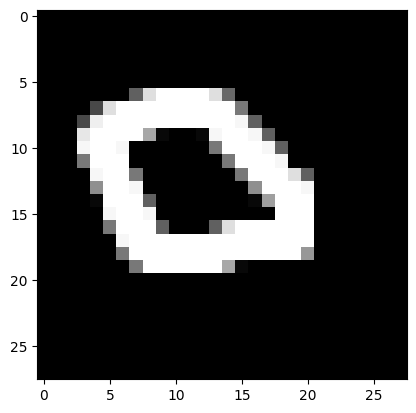

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
[[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0  72 191  96   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0 231 255 247   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0 255 255 255   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0

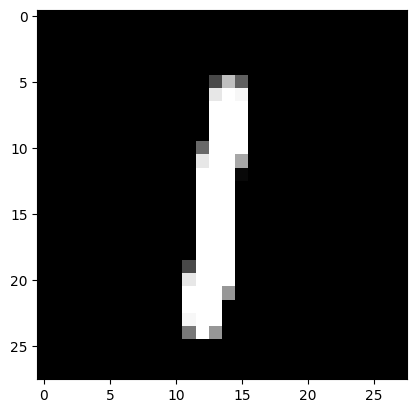

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
[[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0  72 223 255 255 255 255 255 255 223  96
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0  72 239 255 255 255 255 255 255 255 255 247
    96   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0 231 255 255 255 255 255 255 255 255 255 255
   247   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0  72 255 255 255 151   0   0   0   0 120 255 255
   255   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0 231 255 255 255   0   0   0   0   0   0 255 255
   255   0   0   0   0   0   0   0   0   0   0]
  [  0   0

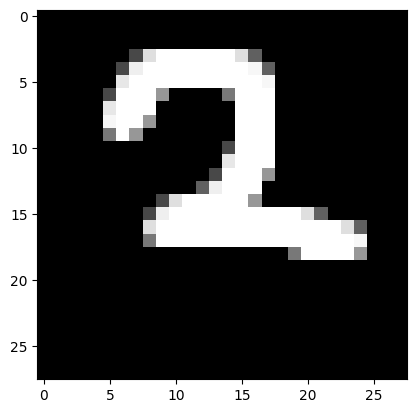

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
[[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0  72 223 255 223 104   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0  72 239 255 255 255 255 255 255 223  96   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0  72 239 255 255 255 255 255 255 255 255 247  96
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0  72 239 255 255 255 159 159 255 255 255 255 255 247
    96   0   0   0   0   0   0   0   0   0   0]
  [  0   0

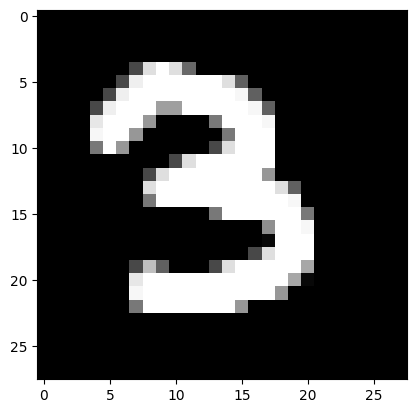

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
[[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0  72 223 223  96   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0 231 255 255 247   0   0   0   0  72 191
    96   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0  72 255 255 255 151   0   0   0   0 231 255
   247   0   0   0   0   0   0   0   0   0   0]
  [  0   0

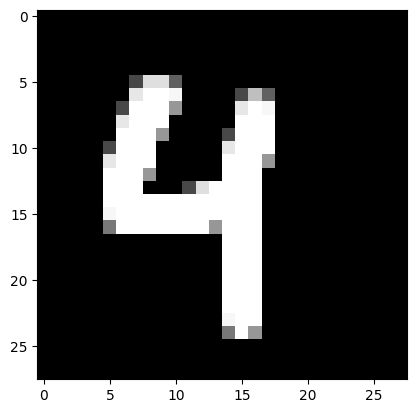

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
[[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0  72 223 255 255 255 255 255 255 255 255 255
   223  96   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0 231 255 255 255 255 255 255 255 255 255 255
   255 247   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0 255 255 255 255 255 255 255 255 255 255 255
   255 151   0   0   0   0   0   0   0   0   0]
  [  0   0

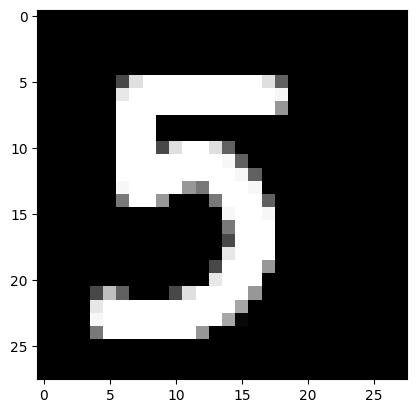

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
[[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0  72 191  96   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0  72 223 255 255 247   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0  72 239 255 255 255 255   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0  72 239 255 255 255 255 151   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   

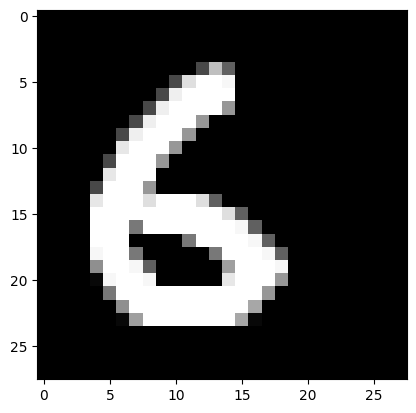

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
[[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0  72 223 255 255 255 255 255 255 255 255 255 255
   223  96   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0 223 255 255 255 255 255 255 255 255 255 255 255
   255 247   0   0   0   0   0   0   0   0   0]
  [  0   0

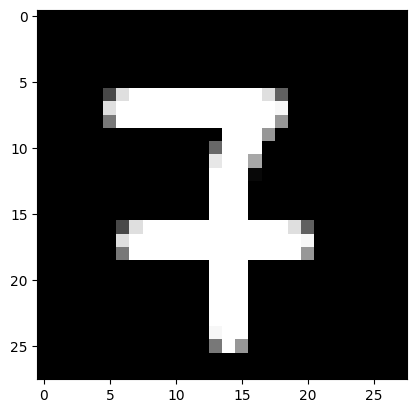

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
[[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0  72 191 223 255
   223  96   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0  72 223 255 255 255 255
   255 247  96   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0  72 239 255 255 255 255 255
   255 255 247  96   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0  72 223 255 255 255 255 255 151 120
   255 255 255 247  96   0   0   0   0   0   0]
  [  0   0

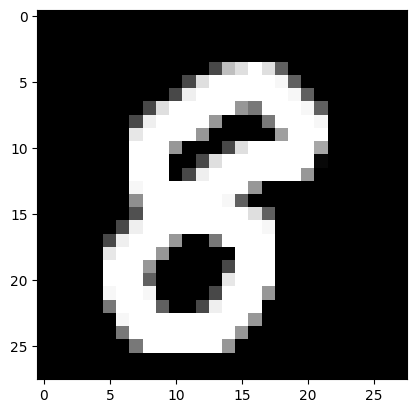

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
[[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0  72 223 255 223 104   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0  72 239 255 255 255 255 223
   104   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0  72 239 255 255 255 255 255 255
   255 120   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0 231 255 255 255 159 159 255 255
   255 247   8   0   0   0   0   0   0   0   0]
  [  0   0

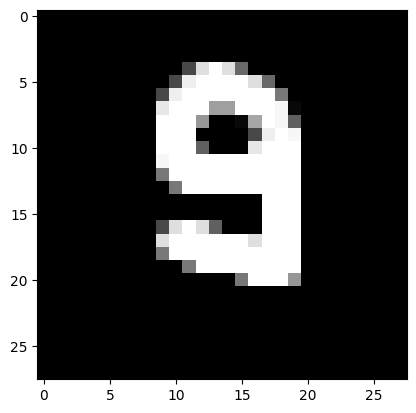

In [ ]:
import os
import cv2
for i in range(10):
  file_dir = f"./digits/image{i}.png"
  if os.path.isfile(file_dir):
    image = cv2.imread(file_dir)[:, :, 0]
    image = np.invert(np.array([image]))
    prediction = new_model.predict(image)
    print(image)
    print(np.argmax(prediction))
    plt.imshow(image[0], cmap="grey")
    plt.show()
    